# Preamble

In [1]:
%matplotlib inline

## Notebook parameters

In [2]:
NAME = 'c_4_calculate_calendar_bias_for_sample' 
PROJECT = 'covid-empirical'
PYTHON_VERSION = '3.9'
USER = 'Ties'
CONDA_ENVIRONMENT = 'covid-empirical'
USE_EXTERNAL_PIPELINE = True

## Run preamble script

In [3]:
%run -i preamble.py 

----------------------------------------------------------------------------------
The following utility functions are loaded and available through `functions.<..>`:
----------------------------------------------------------------------------------

extract_data_edgar_link, fast_load_json, fast_store_json, flatten_multiindex_column, inDB, recreate_edgar_link

----------------------------------------------------------------
The following modules and functions are imported by preamble.py:
----------------------------------------------------------------

copy, delayed, importlib, json, math, np, orjson, os, pd, plt, pqdm_p, pqdm_t, random, re, requests, sys, time, yaml


## Notebook specific imports

In [4]:
import seaborn as sns
from scipy.stats import ks_2samp

In [5]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", rc=custom_params)

----
# Load data
----

## Load regression data

In [6]:
reg_df = pd.read_stata(Path.cwd() / '2_pipeline'/ 'c_1_generate_variables' / 'out' / 'regression_data.dta')

------
# Tabulate / Plot bias estimates
-----

## Create dataset for graph

In [7]:
rel_ea_df = reg_df[reg_df.datacqtr.isin(['2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4'])]

tmp_df = rel_ea_df.groupby(['gvkey', 'calendar_qtr']).size().reset_index().rename(columns={0 :'size'})

graph_df = pd.merge(rel_ea_df, tmp_df, on=['gvkey', 'calendar_qtr'], how='left')

In [8]:
graph_df = graph_df[graph_df.datacqtr.isin(['2020Q1', '2020Q2', '2020Q3', '2020Q4'])]

graph_df['period_id'] = graph_df['datacqtr']

In [9]:
graph_df.period_id.value_counts().sort_index()

2020Q1    3184
2020Q2    3208
2020Q3    3214
2020Q4    3199
Name: period_id, dtype: int64

In [10]:
graph_df.groupby('period_id').calendar_bias.mean()

period_id
2020Q1    1.38
2020Q2    0.58
2020Q3   -1.06
2020Q4   -1.26
Name: calendar_bias, dtype: float64

### Plot

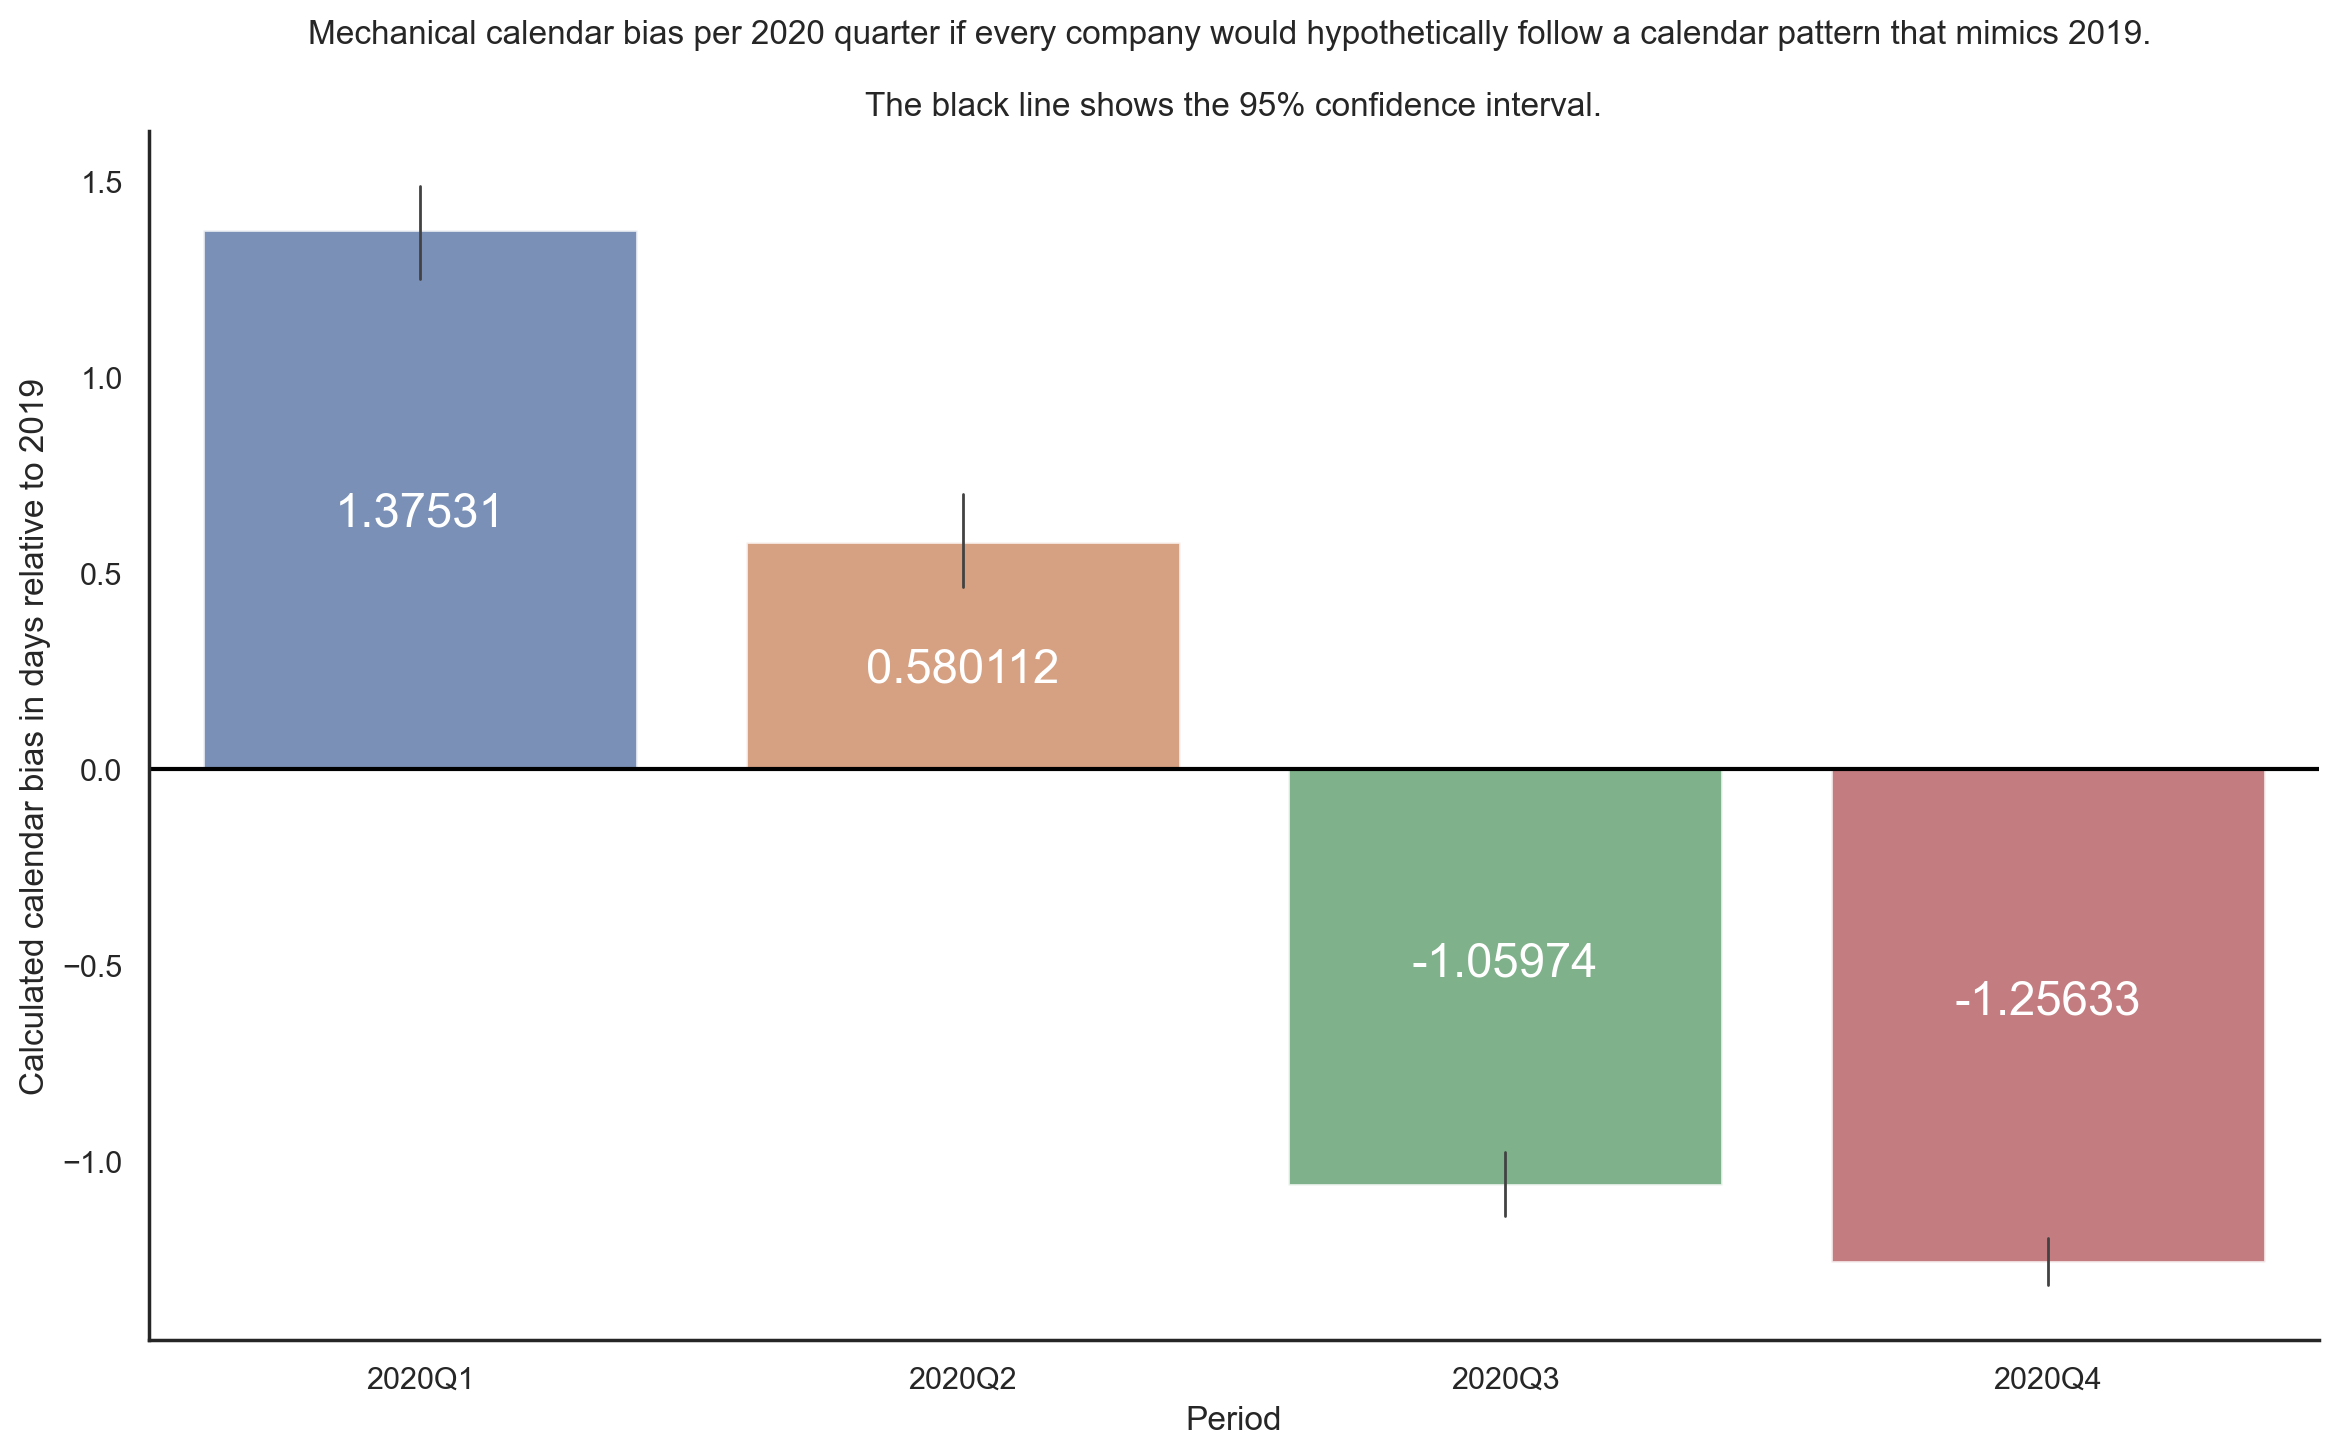

In [11]:
plt.figure(figsize=[14,8], dpi=200)
cp = sns.color_palette("deep", n_colors=4)
ax = sns.barplot(y='calendar_bias', x='period_id', data=graph_df, palette=cp, alpha=0.8, errwidth=1, order=['2020Q1', '2020Q2', '2020Q3', '2020Q4'])
plt.title('''Mechanical calendar bias per 2020 quarter if every company would hypothetically follow a calendar pattern that mimics 2019. \n 
The black line shows the 95% confidence interval.''')
plt.ylabel('Calculated calendar bias in days relative to 2019')
plt.xlabel('Period')
ax.bar_label(ax.containers[0], padding=-5, label_type='center', color='white', fontsize=17, fmt='%g')
plt.axhline(0, color='black')